<a href="https://colab.research.google.com/github/sashutosh/DeepLearning/blob/master/RAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split


In [ ]:
#Importing raw dataset
ras_metrics=pd.read_csv("https://raw.githubusercontent.com/arpitsolanki/new-repo-test/master/Results_clean.csv")
ras_metrics


,timeStamp,averageExecutionTime,medianOfFlowDuration,maxFlowDuration,flowDurationList,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,cpuByProcessList,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,diskByProcessList,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,memByProcessList,percentageHeap,medianOfHeap,maxHeap,percentHeapList,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,percentWorkerThreadsList,avgInBufferSize,medianOfInBuffer,maxInBuffer,inBufferSizeList,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,percentOutBufferList,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu,systemCpuJmxList
0,Jan 10-- 2021 9:15:32 AM,12966.0,13078,14719,14719;13078;13672;12126;11235;,0.112635,0.124,0.170,0.1092260856108677;0.12353175828438517;0.15970...,3.230190e+08,3.230000e+08,323020917,323020917;323019354;323018833;323018312;323017...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.184841,0.224,0.325,0.2554077362030569;0.3245863434169461;0.095981...,2.000000,2.0,2,2.0;2.0;2.0;2.0;2.0;,0.000000,0.0,0,0;0;0;0;0;,1.245333,2.027,2.107,0.02666666666666667;2.106666666666667;2.026666...,0.113167,0.119,0.175,0.10934549395867632;0.11894290098652129;0.1608...
1,Jan 10-- 2021 10:00:16 AM,12150.6,11829,13391,13266;11829;10532;13391;11735;,0.111258,0.138,0.158,0.10703425759446372;0.13787605655030938;0.1528...,3.230241e+08,3.230000e+08,323025606,323025606;323024564;323024043;323023522;323023...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.196522,0.168,0.342,0.1683658401249434;0.2133725508438494;0.103132...,2.000000,2.0,2,2.0;2.0;2.0;2.0;2.0;,0.000000,0.0,0,0;0;0;0;0;,1.658667,2.027,4.040,0.05333333333333334;0.06666666666666667;4.04;2...,0.110290,0.137,0.160,0.11640956064683629;0.13676235709501172;0.1596...
2,Jan 10-- 2021 10:01:55 AM,13150.4,13845,14594,14594;13845;14360;13250;9703;,0.173955,0.208,0.222,0.18856740664698599;0.22046478079850015;0.2083...,3.230295e+08,3.230000e+08,323030816,323030816;323030295;323029253;323028732;323028...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;,0.169525,0.178,0.339,0.17836349632339468;0.33850935520957354;0.2058...,3.000000,3.0,3,3.0;3.0;3.0;3.0;3.0;,0.200000,0.0,1,1;0;0;0;0;,1.274667,0.107,4.040,0.10666666666666667;4.04;0.09333333333333334;0...,0.176758,0.210,0.228,0.1985885535090306;0.2164285809390769;0.210024...
3,Jan 10-- 2021 10:03:56 AM,13566.0,13610,14188,13610;14188;12844;13391;13797;,0.234493,0.261,0.308,0.3084422506340378;0.23552775902134276;0.26140...,3.230350e+08,3.230000e+08,323036547,323036547;323036026;323035505;323034984;323034...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;52.0;52.0;,0.201747,0.239,0.321,0.28046812213182537;0.06476824013161088;0.1540...,4.285714,4.0,6,4.0;6.0;4.0;4.0;4.0;4.0;4.0;,0.000000,0.0,0,0;0;0;0;0;0;0;,0.840000,0.267,3.027,0.26666666666666666;0.26666666666666666;3.0266...,0.234362,0.257,0.308,0.3084400480316922;0.23597092805271735;0.25705...
4,Jan 10-- 2021 10:05:52 AM,13694.4,13438,14828,14518;12985;13438;14828;12703;,0.257938,0.295,0.314,0.293011262335781;0.2705949019938888;0.3140254...,3.230411e+08,3.230000e+08,323042799,323042799;323042278;323041236;323040715;323040...,52.0,52.0,52,52.0;52.0;52.0;52.0;52.0;52.0;,0.211632,0.222,0.345,0.31847118623185866;0.15339040756225586;0.2906...,5.000000,5.0,5,5.0;5.0;5.0;5.0;5.0;5.0;,0.000000,0.0,0,0;0;0;0;0;0;,1.075556,0.100,4.067,0.05333333333333334;0.10666666666666667;0.0933...,0.260198,0.302,0.319,0.30259890338475426;0.27025738379102726;0.3039...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Jan 12-- 2021 10:43:25 PM,127900.8,127188,130417,127188;130417;129869;125703;126327;,0.688728,0.852,0.999,0.5876679338360592;0.7261053975094892;0.467184...,5.606342e+09,5.610000e+09,5611972264,5611972264;5610188579;5609360016;5607264801;56...,53.0,53.0,53,53.0;53.0;53.0;53.0;53.0;53.0;53.0;53.0;53.0;5...,0.679425,0.683,0.815,0.5968609749721188;0.8149942865739065;0.727499...,56.272727,56.0,57,57.0;57.0;57.0;56.0;56.0;56.0;

In [ ]:
#looking at the distribution of values of each of the columns in the dataset
ras_metrics.describe()

,averageExecutionTime,medianOfFlowDuration,maxFlowDuration,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,20028.366771,20423.605016,23059.333856,0.253008,0.268862,0.366307,2.193656e+09,2.193223e+09,2.194911e+09,47.842768,47.841693,47.851097,0.343336,0.342362,0.431585,32.094169,32.078370,32.978056,1.177517,0.914577,2.313480,1.766842,1.558594,3.409219,0.255950,0.271878,0.369934
std,22567.116298,23939.553047,25443.049856,0.171436,0.187970,0.240635,1.646101e+09,1.646095e+09,1.646819e+09,9.740239,9.740189,9.736953,0.183159,0.187969,0.178141,23.065570,23.091402,23.622744,5.249489,4.641985,11.067745,0.928970,1.191845,1.608450,0.174224,0.191056,0.243759
min,9073.000000,8923.000000,10178.000000,0.034228,0.016000,0.063000,1.196239e+08,1.200000e+08,1.196239e+08,18.000000,18.000000,18.000000,0.086182,0.054000,0.107000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11721.050000,11894.250000,13097.750000,0.078547,0.086000,0.132250,3.269804e+08,3.270000e+08,3.269813e+08,51.000000,51.000000,51.000000,0.195568,0.192000,0.300000,11.625000,11.625000,12.000000,0.000000,0.000000,0.000000,1.058000,0.587000,2.093000,0.080899,0.087250,0.136000
50%,12965.600000,13070.000000,14455.500000,0.243457,0.256000,0.359000,2.579520e+09,2.580000e+09,2.579521e+09,51.000000,51.000000,51.000000,0.261349,0.273500,0.356000,31.100000,31.000000,32.000000,0.000000,0.000000,0.000000,1.608333,1.380000,3.586500,0.243858,0.256000,0.358500
75%,14536.450000,14667.000000,16173.500000,0.385154,0.415750,0.542000,3.227835e+09,3.230000e+09,3.227993e+09,52.000000,52.000000,52.000000,0.488087,0.493750,0.575250,49.575000,50.000000,51.000000,0.000000,0.000000,0.000000,2.285833,2.147000,4.316750,0.389296,0.418000,0.549500
max,233506.200000,233401.000000,235501.000000,0.772581,0.906000,1.000000,6.311979e+09,6.310000e+09,6.318758e+09,53.000000,53.000000,53.000000,0.881175,0.881000,0.902000,91.333333,91.000000,92.000000,71.500000,71.500000,143.000000,5.000000,5.360000,8.973000,0.777518,0.909000,1.000000


In [ ]:
#Checking if missing values are present for any column
ras_metrics.isnull().any()

timeStamp                   False
averageExecutionTime        False
medianOfFlowDuration        False
maxFlowDuration             False
flowDurationList            False
avgCpuByProcess             False
medianOfCpuByProcess        False
maxCpuByProcess             False
cpuByProcessList            False
avgDiskByProcess            False
medianOfDiskByProcess       False
maxDiskByProcess            False
diskByProcessList           False
avgMemByProcess             False
medianOfMemByProcess        False
maxMemByProcess             False
memByProcessList            False
percentageHeap              False
medianOfHeap                False
maxHeap                     False
percentHeapList             False
percentageWorkerThreads     False
medianOfWorkerThreads       False
maxWorkerThreads            False
percentWorkerThreadsList    False
avgInBufferSize             False
medianOfInBuffer            False
maxInBuffer                 False
inBufferSizeList            False
percentageOutB

In [ ]:
ras_metrics.dtypes

Execution_Time    float64
CPU               float64
Disk              float64
Memory            float64
Heap              float64
Threads           float64
dtype: object

In [ ]:
#Visualization of dependent variable
fig = px.histogram(ras_metrics, x="maxHeap",title='Distribution of Heap',height=400)
fig.show()

In [ ]:
#Visualization of dependent variable
fig = px.histogram(ras_metrics, x="averageExecutionTime",title='Distribution of ExecutionTime',height=400)
fig.show()

fig1 = px.violin(ras_metrics, x="averageExecutionTime",title='Violin Plot for ExecutionTime',height=300)
#fig1.update_traces(box_visible=True, meanline_visible=True)
fig1.show()


# fig2 = px.violin(ras_metrics, x="Execution_Time",title='Violin Plot for Log(ExecutionTime)',height=300)
# fig2.update_traces(box_visible=True, meanline_visible=True)
# fig2.show()

In [ ]:
#Calculating log of dependent variable
ras_metrics['logExecution_Time']=np.log(ras_metrics['Execution_Time'])
fig = px.histogram(data_frame=ras_metrics, x="logExecution_Time",title='Distribution of ExecutionTime',height=400)
fig.show()

#ras_metrics=ras_metrics.loc[ras_metrics['Execution_Time']<=100000]


In [ ]:
len(ras_metrics.columns)


('timeStamp',
 'averageExecutionTime',
 'medianOfFlowDuration',
 'maxFlowDuration',
 'flowDurationList',
 'avgCpuByProcess',
 'medianOfCpuByProcess',
 'maxCpuByProcess',
 'cpuByProcessList',
 'avgDiskByProcess',
 'medianOfDiskByProcess',
 'maxDiskByProcess',
 'diskByProcessList',
 'avgMemByProcess',
 'medianOfMemByProcess',
 'maxMemByProcess',
 'memByProcessList',
 'percentageHeap',
 'medianOfHeap',
 'maxHeap',
 'percentHeapList',
 'percentageWorkerThreads',
 'medianOfWorkerThreads',
 'maxWorkerThreads',
 'percentWorkerThreadsList',
 'avgInBufferSize',
 'medianOfInBuffer',
 'maxInBuffer',
 'inBufferSizeList',
 'percentageOutBuffer',
 'medianOfOutBuffer',
 'maxOutBuffer',
 'percentOutBufferList',
 'avgSystemCpuJmx',
 'medianOfSystemCpu',
 'maxSystemCpu',
 'systemCpuJmxList')

In [ ]:
ras_metrics=ras_metrics.loc[ras_metrics['averageExecutionTime']<=15000]
del ras_metrics['timeStamp']


In [ ]:
#tup=tuple(cols)
tup=tuple(ras_metrics.columns)

fig = make_subplots(
    rows=9, cols=4,shared_yaxes=True,subplot_titles=tup)
#    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))
k=1
j=1

#ras_metrics1=ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','avgDiskByProcess','percentageOutBuffer','maxWorkerThreads']]
cols=ras_metrics.columns

for i in range(0,36):
  fig.add_trace(
    go.Scatter(y=ras_metrics['averageExecutionTime'], x=ras_metrics.iloc[:,i],mode='markers',name=cols[i]),
    row=k, col=j
    )
  print(k,j,i)

  j=j%4
  j=j+1
  if j==1:

    k=k%9
    k=k+1
  # if((i%2==0)&(i!=0)):
  #   k=k+1

fig.update_layout(height=2000, width=800,
                  title_text="Dependency between SalePrice & Continous Variables",showlegend=False)
fig.show()

1 1 0
1 2 1
1 3 2
1 4 3
2 1 4
2 2 5
2 3 6
2 4 7
3 1 8
3 2 9
3 3 10
3 4 11
4 1 12
4 2 13
4 3 14
4 4 15
5 1 16
5 2 17
5 3 18
5 4 19
6 1 20
6 2 21
6 3 22
6 4 23
7 1 24
7 2 25
7 3 26
7 4 27
8 1 28
8 2 29
8 3 30
8 4 31
9 1 32
9 2 33
9 3 34
9 4 35


In [ ]:
corr = ras_metrics.corr()
corr

,averageExecutionTime,medianOfFlowDuration,maxFlowDuration,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
averageExecutionTime,1.000000,0.944704,0.875818,0.665719,0.643174,0.657157,0.214887,0.215346,0.215398,-0.103238,-0.103321,-0.102970,0.137516,0.141605,0.164121,0.324405,0.323415,0.299556,0.076914,0.107880,0.063933,0.148209,0.081785,0.125133,0.661152,0.639448,0.652549
medianOfFlowDuration,0.944704,1.000000,0.836834,0.633146,0.607242,0.630274,0.221636,0.222067,0.222117,-0.105937,-0.106013,-0.105727,0.132848,0.138594,0.155300,0.314078,0.313290,0.288855,0.102093,0.134988,0.081742,0.089365,0.028306,0.066252,0.627634,0.602769,0.624456
maxFlowDuration,0.875818,0.836834,1.000000,0.609943,0.589994,0.599584,0.214768,0.215198,0.215294,-0.094690,-0.094741,-0.094684,0.114905,0.117155,0.126610,0.302349,0.301316,0.279740,0.077965,0.125517,0.062883,0.031515,-0.032987,0.020579,0.605191,0.585770,0.594494
avgCpuByProcess,0.665719,0.633146,0.609943,1.000000,0.990445,0.984359,0.405652,0.406061,0.406461,-0.010785,-0.010768,-0.010699,0.074994,0.078650,0.087515,0.396064,0.392966,0.358084,0.060461,0.072518,0.055320,0.302617,0.238270,0.232208,0.994952,0.986061,0.979866
medianOfCpuByProcess,0.643174,0.607242,0.589994,0.990445,1.000000,0.962080,0.386294,0.386697,0.387102,0.003604,0.003659,0.003688,0.074222,0.077793,0.088915,0.355994,0.352743,0.318528,0.057545,0.057105,0.054861,0.291889,0.235814,0.216614,0.985890,0.995520,0.958377
maxCpuByProcess,0.657157,0.630274,0.599584,0.984359,0.962080,1.000000,0.397991,0.398378,0.398790,-0.017031,-0.017018,-0.016940,0.061534,0.066201,0.079475,0.379049,0.376079,0.342991,0.053076,0.068141,0.050461,0.282503,0.215169,0.235166,0.982249,0.960766,0.996924
avgDiskByProcess,0.214887,0.221636,0.214768,0.405652,0.386294,0.397991,1.000000,0.999999,0.999999,0.386714,0.386835,0.386582,0.181960,0.178948,0.175547,0.085475,0.084382,0.071302,0.027919,0.119832,0.000402,0.073633,0.094132,-0.056819,0.411219,0.390995,0.401253
medianOfDiskByProcess,0.215346,0.222067,0.215198,0.406061,0.386697,0.398378,0.999999,1.000000,0.999998,0.386589,0.386711,0.386457,0.182159,0.179143,0.175709,0.085960,0.084867,0.071778,0.027973,0.119956,0.000440,0.073732,0.094192,-0.056818,0.411624,0.391394,0.401636
maxDiskByProcess,0.215398,0.222117,0.215294,0.406461,0.387102,0.398790,0.999999,0.999998,1.000000,0.386557,0.386679,0.386426,0.181690,0.178682,0.175320,0.085812,0.084717,0.071607,0.027862,0.119744,0.000366,0.073854,0.094234,-0.056468,0.412031,0.391806,0.402053
avgMemByProcess,-0.103238,-0.105937,-0.094690,-0.010785,0.003604,-0.017031,0.386714,0.386589,0.386557,1.000000,0.999997,0.999985,0.291220,0.286321,0.293931,-0.219086,-0.221036,-0.199296,0.052264,0.052751,0.045284,-0.046094,-0.002570,-0.122489,-0.002866,0.009165,-0.011464


In [ ]:
del ras_metrics['Execution_Time']


In [ ]:
y=ras_metrics['logExecution_Time']#log of dependent variable
X=ras_metrics.iloc[:,:-1]

X_train,X_test,Y_train,Y_Test=train_test_split(X, y,test_size=0.2,random_state=1)


,CPU,Disk,Memory,Heap,Threads
0,6.000000,2.599394e+08,16.416667,0.228400,5.083333
1,7.000000,2.684195e+08,17.625000,0.243294,8.000000
2,8.333333,2.765037e+08,19.444444,0.295343,10.222222
3,9.857143,2.842889e+08,21.714286,0.406827,13.000000
4,11.000000,2.922058e+08,23.750000,0.443704,15.250000
...,...,...,...,...,...
404,10.000000,1.095025e+09,40.000000,0.284605,5.454545
405,10.000000,1.108756e+09,40.000000,0.559040,71.111111
406,10.000000,1.130871e+09,39.795181,0.405573,46.445783
407,10.000000,1.153327e+09,40.000000,0.718683,90.263158


RSquared value for Model 0.2925881906848309


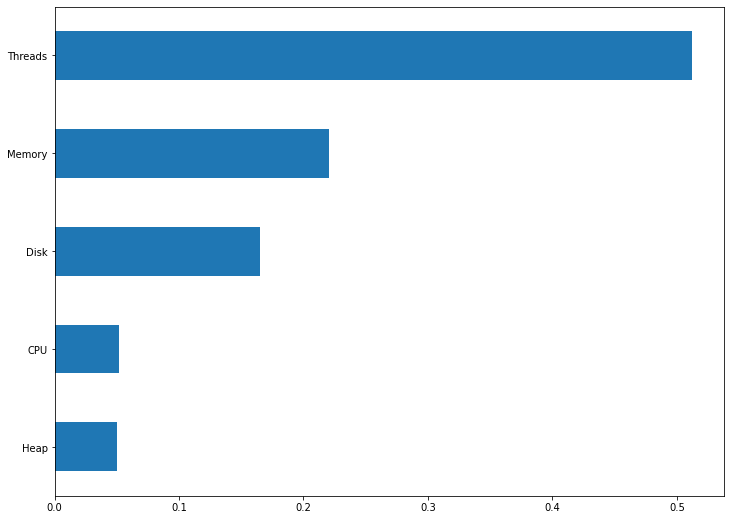

In [ ]:
from sklearn.ensemble import RandomForestRegressor #Random forest libraries

regressor = RandomForestRegressor(n_estimators=10, random_state=1,max_depth=3,max_features=3,min_samples_leaf=5)  
feature_list=X.columns

# # fit the regressor with X and Y data 
model=regressor.fit(X_train,Y_train) 

#Make predictions on test dataset
pred_rf=model.predict(X_test)


scoreOfModel = model.score(X_test, Y_Test)
print("RSquared value for Model",scoreOfModel)

feat_importances = pd.Series(model.feature_importances_, index=feature_list)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(12,9))

In [ ]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import GridSearchCV   #Grid search for finding out the best package

lasso=Lasso(max_iter=10000)
parameters={'alpha': [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_regressor.fit(X_train,Y_train)

#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
best_grid_lasso=lasso_regressor.best_params_

print(lasso_regressor.best_params_)
print("R Squared value for the model",lasso_regressor.best_score_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.34783594415859, tolerance: 0.01787561276308671



{'alpha': 0.01}
R Squared value for the model 0.22301222838961193


In [ ]:
lasso_model=Lasso(alpha=1e-15,max_iter=10000).fit(X_train,Y_train)
pred_gs_lasso=lasso_model.predict(X_test)
#print("RMSLE for the model",np.sqrt(mean_squared_log_error(np.exp(Y_Test), np.exp(pred_gs_lasso) )))


In [ ]:
coef = pd.Series(lasso_model.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

ValueError: ignored

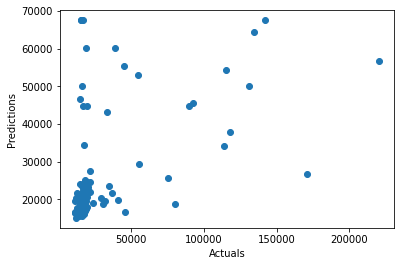

In [ ]:

import matplotlib.pyplot as plt

predictions=np.exp(pred_rf)
actuals=np.exp(Y_Test)
residuals=predictions-actuals

plt.scatter(actuals, predictions)
plt.xlabel("Actuals")
plt.ylabel("Predictions")
plt.show()

# predictions=np.exp(pred_gs_xg)
# residuals=predictions-actuals

# plt.scatter(predictions, residuals)
# plt.xlabel("SalePrice")
# plt.ylabel("Residuals")
# plt.show()

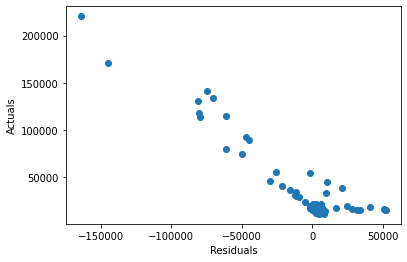

In [ ]:
predictions=np.exp(pred_rf)
actuals=np.exp(Y_Test)
residuals=predictions-actuals

plt.scatter(residuals, actuals)
plt.xlabel("Residuals")
plt.ylabel("Actuals")
plt.show()